In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import holidays

In [2]:
afDataset = pd.read_csv("Scraped_dataset.csv")
afDataset.info()
afDataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date of Booking  452088 non-null  object
 1   Date of Journey  452088 non-null  object
 2   Airline-Class    452088 non-null  object
 3   Departure Time   452088 non-null  object
 4   Arrival Time     452088 non-null  object
 5   Duration         452088 non-null  object
 6   Total Stops      452088 non-null  object
 7   Price            452088 non-null  object
dtypes: object(8)
memory usage: 27.6+ MB


,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


In [3]:
afDataset[["Airline","FlightNo","Class"]] = afDataset["Airline-Class"].str.split("\n",expand=True)
afDataset[["DepartureTime","DepartureLocation"]] = afDataset["Departure Time"].str.split("\n",expand=True)
afDataset[["ArrivalTime","ArrivalLocation"]] = afDataset["Arrival Time"].str.split("\n",expand=True)
afDataset["Duration"] = pd.to_numeric(afDataset["Duration"].str.replace(" ","").str.replace("h",".").str.replace("m",""))
afDataset["Price"] = pd.to_numeric(afDataset["Price"].str.replace(",",""))
afDataset["Date of Booking"] = pd.to_datetime(afDataset["Date of Booking"],dayfirst=True)
afDataset["Date of Journey"] = pd.to_datetime(afDataset["Date of Journey"],dayfirst=True)
afDataset["BookingJourneyDifference"] = (afDataset["Date of Journey"]-afDataset["Date of Booking"]) / np.timedelta64(1, "D")
afDataset["JourneyDayOfWeek"] = afDataset["Date of Journey"].dt.day_name() #pd.to_datetime(afDataset["Date of Journey"],dayfirst=True).dt.day_name()
afDataset["Total Stops"] = afDataset["Total Stops"].apply(lambda x: 1 if x.startswith("1") else 2 if x.startswith("2")  else 0)#1 if afDataset["Total Stops"].str.startswith("1")  else 2 if afDataset["Date of Journey"].str.startswith("2")  else 0
afDataset["DepartureRange"] = afDataset["DepartureTime"].apply(lambda x: "Before 6 am" if pd.to_numeric(x.replace(":",".")) < 6 else "6 am to 12 noon" if pd.to_numeric(x.replace(":",".")) >= 6 and pd.to_numeric(x.replace(":",".")) <= 12 else "12 noon to 6 pm" if pd.to_numeric(x.replace(":",".")) > 12 and pd.to_numeric(x.replace(":",".")) <= 18 else"After 6 pm" if pd.to_numeric(x.replace(":",".")) > 18 else "No time")
afDataset["ArrivalRange"] = afDataset["ArrivalTime"].apply(lambda x: "Before 6 am" if pd.to_numeric(x.replace(":",".")) < 6 else "6 am to 12 noon" if pd.to_numeric(x.replace(":",".")) >= 6 and pd.to_numeric(x.replace(":",".")) <= 12 else "12 noon to 6 pm" if pd.to_numeric(x.replace(":",".")) > 12 and pd.to_numeric(x.replace(":",".")) <= 18 else"After 6 pm" if pd.to_numeric(x.replace(":",".")) > 18 else "No time")

afDataset = afDataset.drop(["Airline-Class","Departure Time","Arrival Time"],axis=1)
afDataset.head()

,Date of Booking,Date of Journey,Duration,Total Stops,Price,Airline,FlightNo,Class,DepartureTime,DepartureLocation,ArrivalTime,ArrivalLocation,BookingJourneyDifference,JourneyDayOfWeek,DepartureRange,ArrivalRange
0,2023-01-15,2023-01-16,2.05,0,5335,SpiceJet,SG-8169,ECONOMY,20:00,Delhi,22:05,Mumbai,1.0,Monday,After 6 pm,After 6 pm
1,2023-01-15,2023-01-16,2.20,0,5899,Indigo,6E-2519,ECONOMY,23:00,Delhi,01:20,Mumbai,1.0,Monday,After 6 pm,Before 6 am
2,2023-01-15,2023-01-16,2.10,0,5801,GO FIRST,G8- 354,ECONOMY,22:30,Delhi,00:40,Mumbai,1.0,Monday,After 6 pm,Before 6 am
3,2023-01-15,2023-01-16,2.05,0,5794,SpiceJet,SG-8709,ECONOMY,18:50,Delhi,20:55,Mumbai,1.0,Monday,After 6 pm,After 6 pm
4,2023-01-15,2023-01-16,2.10,0,5955,Air India,AI-805,ECONOMY,20:00,Delhi,22:10,Mumbai,1.0,Monday,After 6 pm,After 6 pm


In [4]:
# [Obsolete]
# print(afDataset.shape)
# afDataset.drop_duplicates(keep=False)
# afDataset = afDataset.dropna()
afDataset.shape

(452088, 16)

[Obsolete]
sns.relplot(
    data=afDataset,
    x="Airline", y="Price", 
    col="Total Stops", row="Class",
    hue="DepartureLocation", style="ArrivalLocation", size="BookingJourneyDifference"
)

[Obsolete]
sns.relplot(
    data=afDataset,
    x="DepartureLocation", y="Price", 
    col="Total Stops", row="Class",
    hue="Airline", style="JourneyDayOfWeek", size="BookingJourneyDifference", kind="line"
)

[Obsolete]
sns.relplot(
    data=afDataset.loc[afDataset["Class"] == "ECONOMY"],
    x="DepartureLocation", y="Price", 
    col="Total Stops", row="ArrivalLocation",
    hue="Airline", style="JourneyDayOfWeek", size="BookingJourneyDifference"
)

<Axes: xlabel='Total Stops', ylabel='Price'>

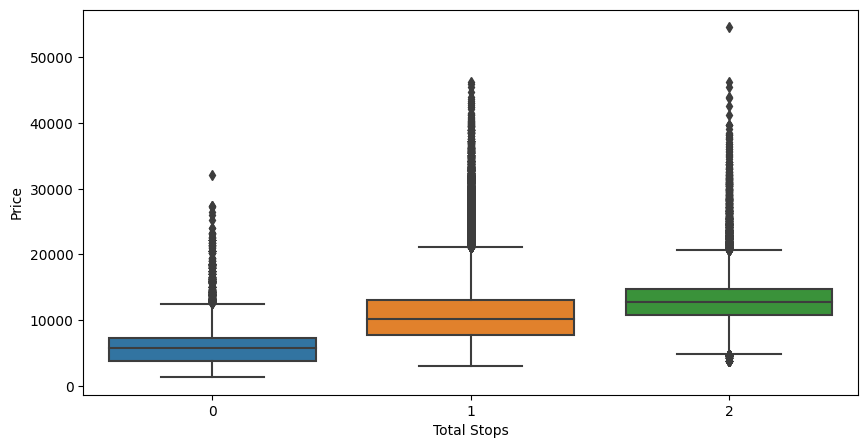

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=afDataset.loc[afDataset["Class"] == "ECONOMY"],
    x="Total Stops", y="Price"
)

<Axes: xlabel='JourneyDayOfWeek', ylabel='Price'>

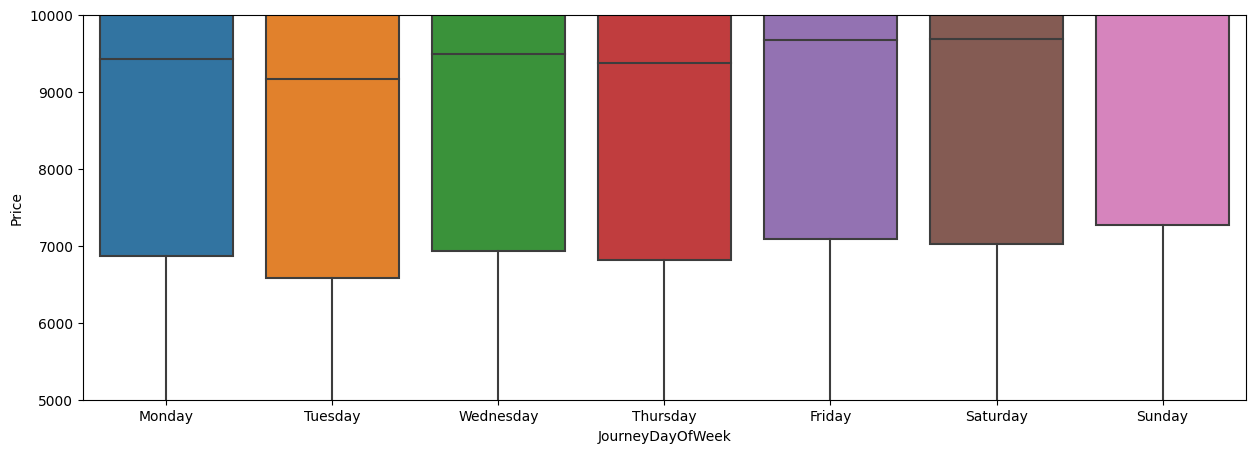

In [6]:
plt.figure(figsize=(15,5))
plt.ylim(5000, 10000)

sns.boxplot(
    data=afDataset.loc[afDataset["Class"] == "ECONOMY"],
    x="JourneyDayOfWeek", y="Price"
)

<Axes: xlabel='BookingJourneyDifference', ylabel='Price'>

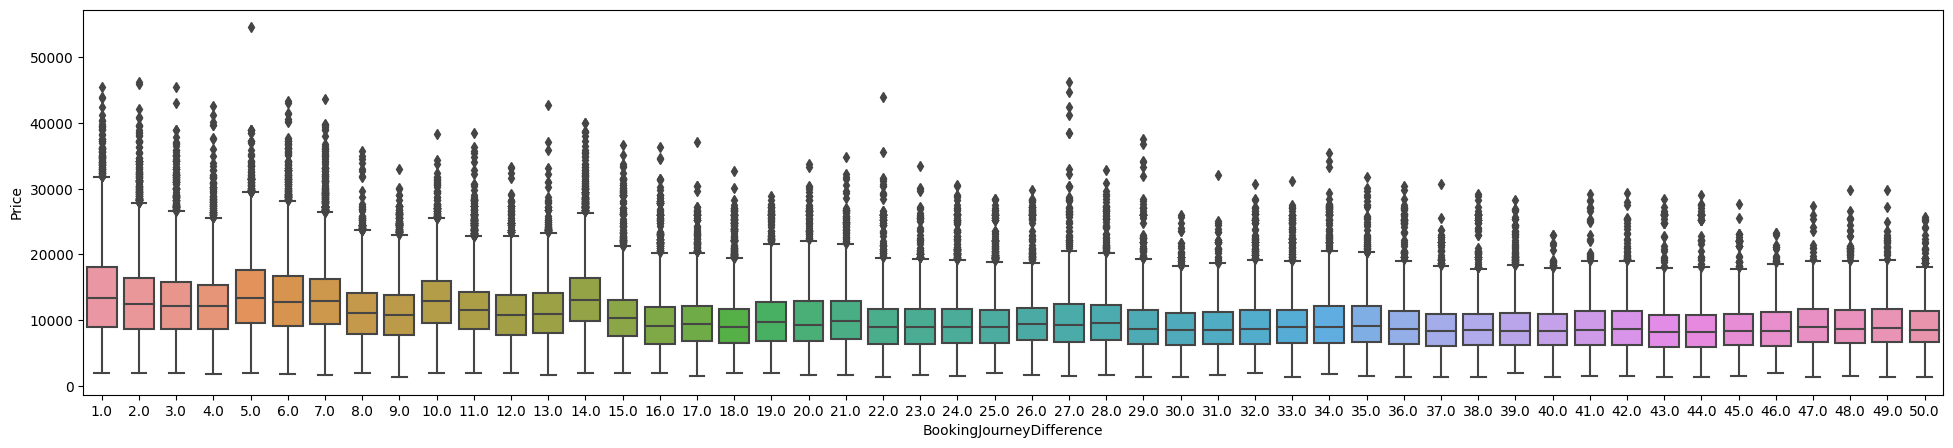

In [7]:
plt.figure(figsize=(24,5))
sns.boxplot(
    data=afDataset.loc[afDataset["Class"] == "ECONOMY"],
    x="BookingJourneyDifference", y="Price"
)

,Date of Booking,Date of Journey,Duration,Total Stops,Price,Airline,FlightNo,Class,DepartureTime,DepartureLocation,ArrivalTime,ArrivalLocation,BookingJourneyDifference,JourneyDayOfWeek,DepartureRange,ArrivalRange
0,2023-01-15,2023-01-16,2.05,0,5335,SpiceJet,SG-8169,ECONOMY,20:00,Delhi,22:05,Mumbai,1.0,Monday,After 6 pm,After 6 pm
1,2023-01-15,2023-01-16,2.20,0,5899,Indigo,6E-2519,ECONOMY,23:00,Delhi,01:20,Mumbai,1.0,Monday,After 6 pm,Before 6 am
2,2023-01-15,2023-01-16,2.10,0,5801,GO FIRST,G8- 354,ECONOMY,22:30,Delhi,00:40,Mumbai,1.0,Monday,After 6 pm,Before 6 am
3,2023-01-15,2023-01-16,2.05,0,5794,SpiceJet,SG-8709,ECONOMY,18:50,Delhi,20:55,Mumbai,1.0,Monday,After 6 pm,After 6 pm
4,2023-01-15,2023-01-16,2.10,0,5955,Air India,AI-805,ECONOMY,20:00,Delhi,22:10,Mumbai,1.0,Monday,After 6 pm,After 6 pm


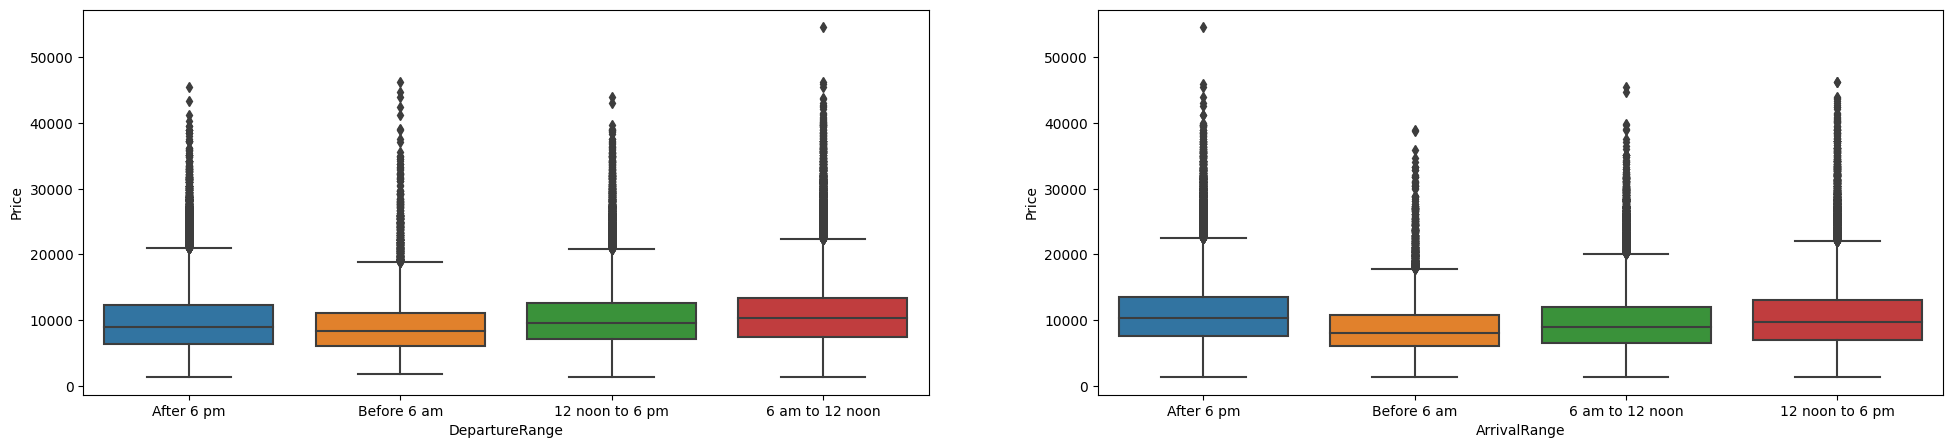

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(24, 5))


sns.boxplot(
    data=afDataset.loc[afDataset["Class"] == "ECONOMY"],
    x="DepartureRange", y="Price", ax=ax[0]
)

sns.boxplot(
    data=afDataset.loc[afDataset["Class"] == "ECONOMY"],
    x="ArrivalRange", y="Price", ax=ax[1]
)
afDataset.head()

,Date of Booking,Date of Journey,Duration,Total Stops,Price,Airline,FlightNo,Class,DepartureTime,DepartureLocation,ArrivalTime,ArrivalLocation,BookingJourneyDifference,JourneyDayOfWeek,DepartureRange,ArrivalRange
0,2023-01-15,2023-01-16,2.05,0,5335,SpiceJet,SG-8169,ECONOMY,20:00,Delhi,22:05,Mumbai,1.0,Monday,After 6 pm,After 6 pm
1,2023-01-15,2023-01-16,2.20,0,5899,Indigo,6E-2519,ECONOMY,23:00,Delhi,01:20,Mumbai,1.0,Monday,After 6 pm,Before 6 am
2,2023-01-15,2023-01-16,2.10,0,5801,GO FIRST,G8- 354,ECONOMY,22:30,Delhi,00:40,Mumbai,1.0,Monday,After 6 pm,Before 6 am
3,2023-01-15,2023-01-16,2.05,0,5794,SpiceJet,SG-8709,ECONOMY,18:50,Delhi,20:55,Mumbai,1.0,Monday,After 6 pm,After 6 pm
4,2023-01-15,2023-01-16,2.10,0,5955,Air India,AI-805,ECONOMY,20:00,Delhi,22:10,Mumbai,1.0,Monday,After 6 pm,After 6 pm


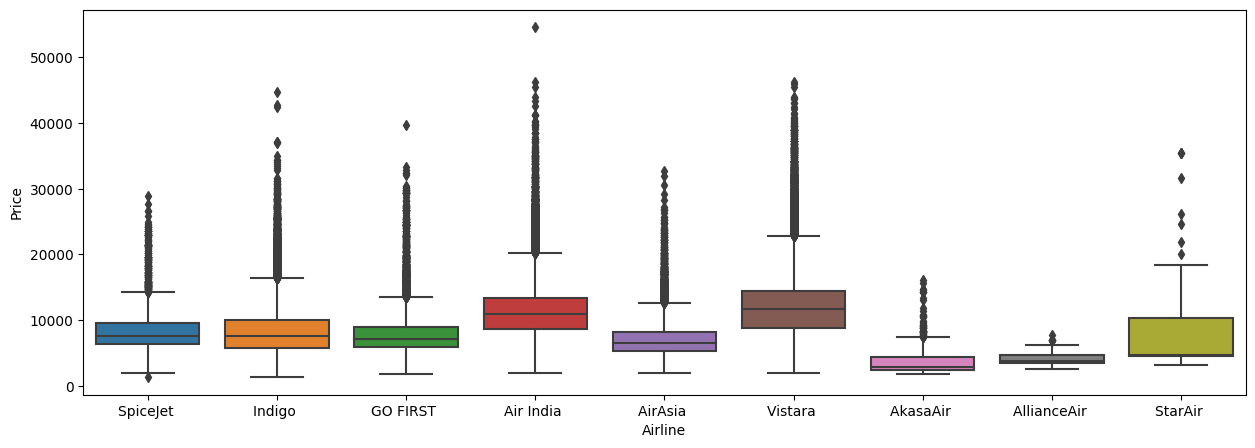

In [9]:
plt.figure(figsize=(15,5))

sns.boxplot(
    data=afDataset.loc[afDataset["Class"] == "ECONOMY"],
    x="Airline", y="Price"
)

afDataset.head()

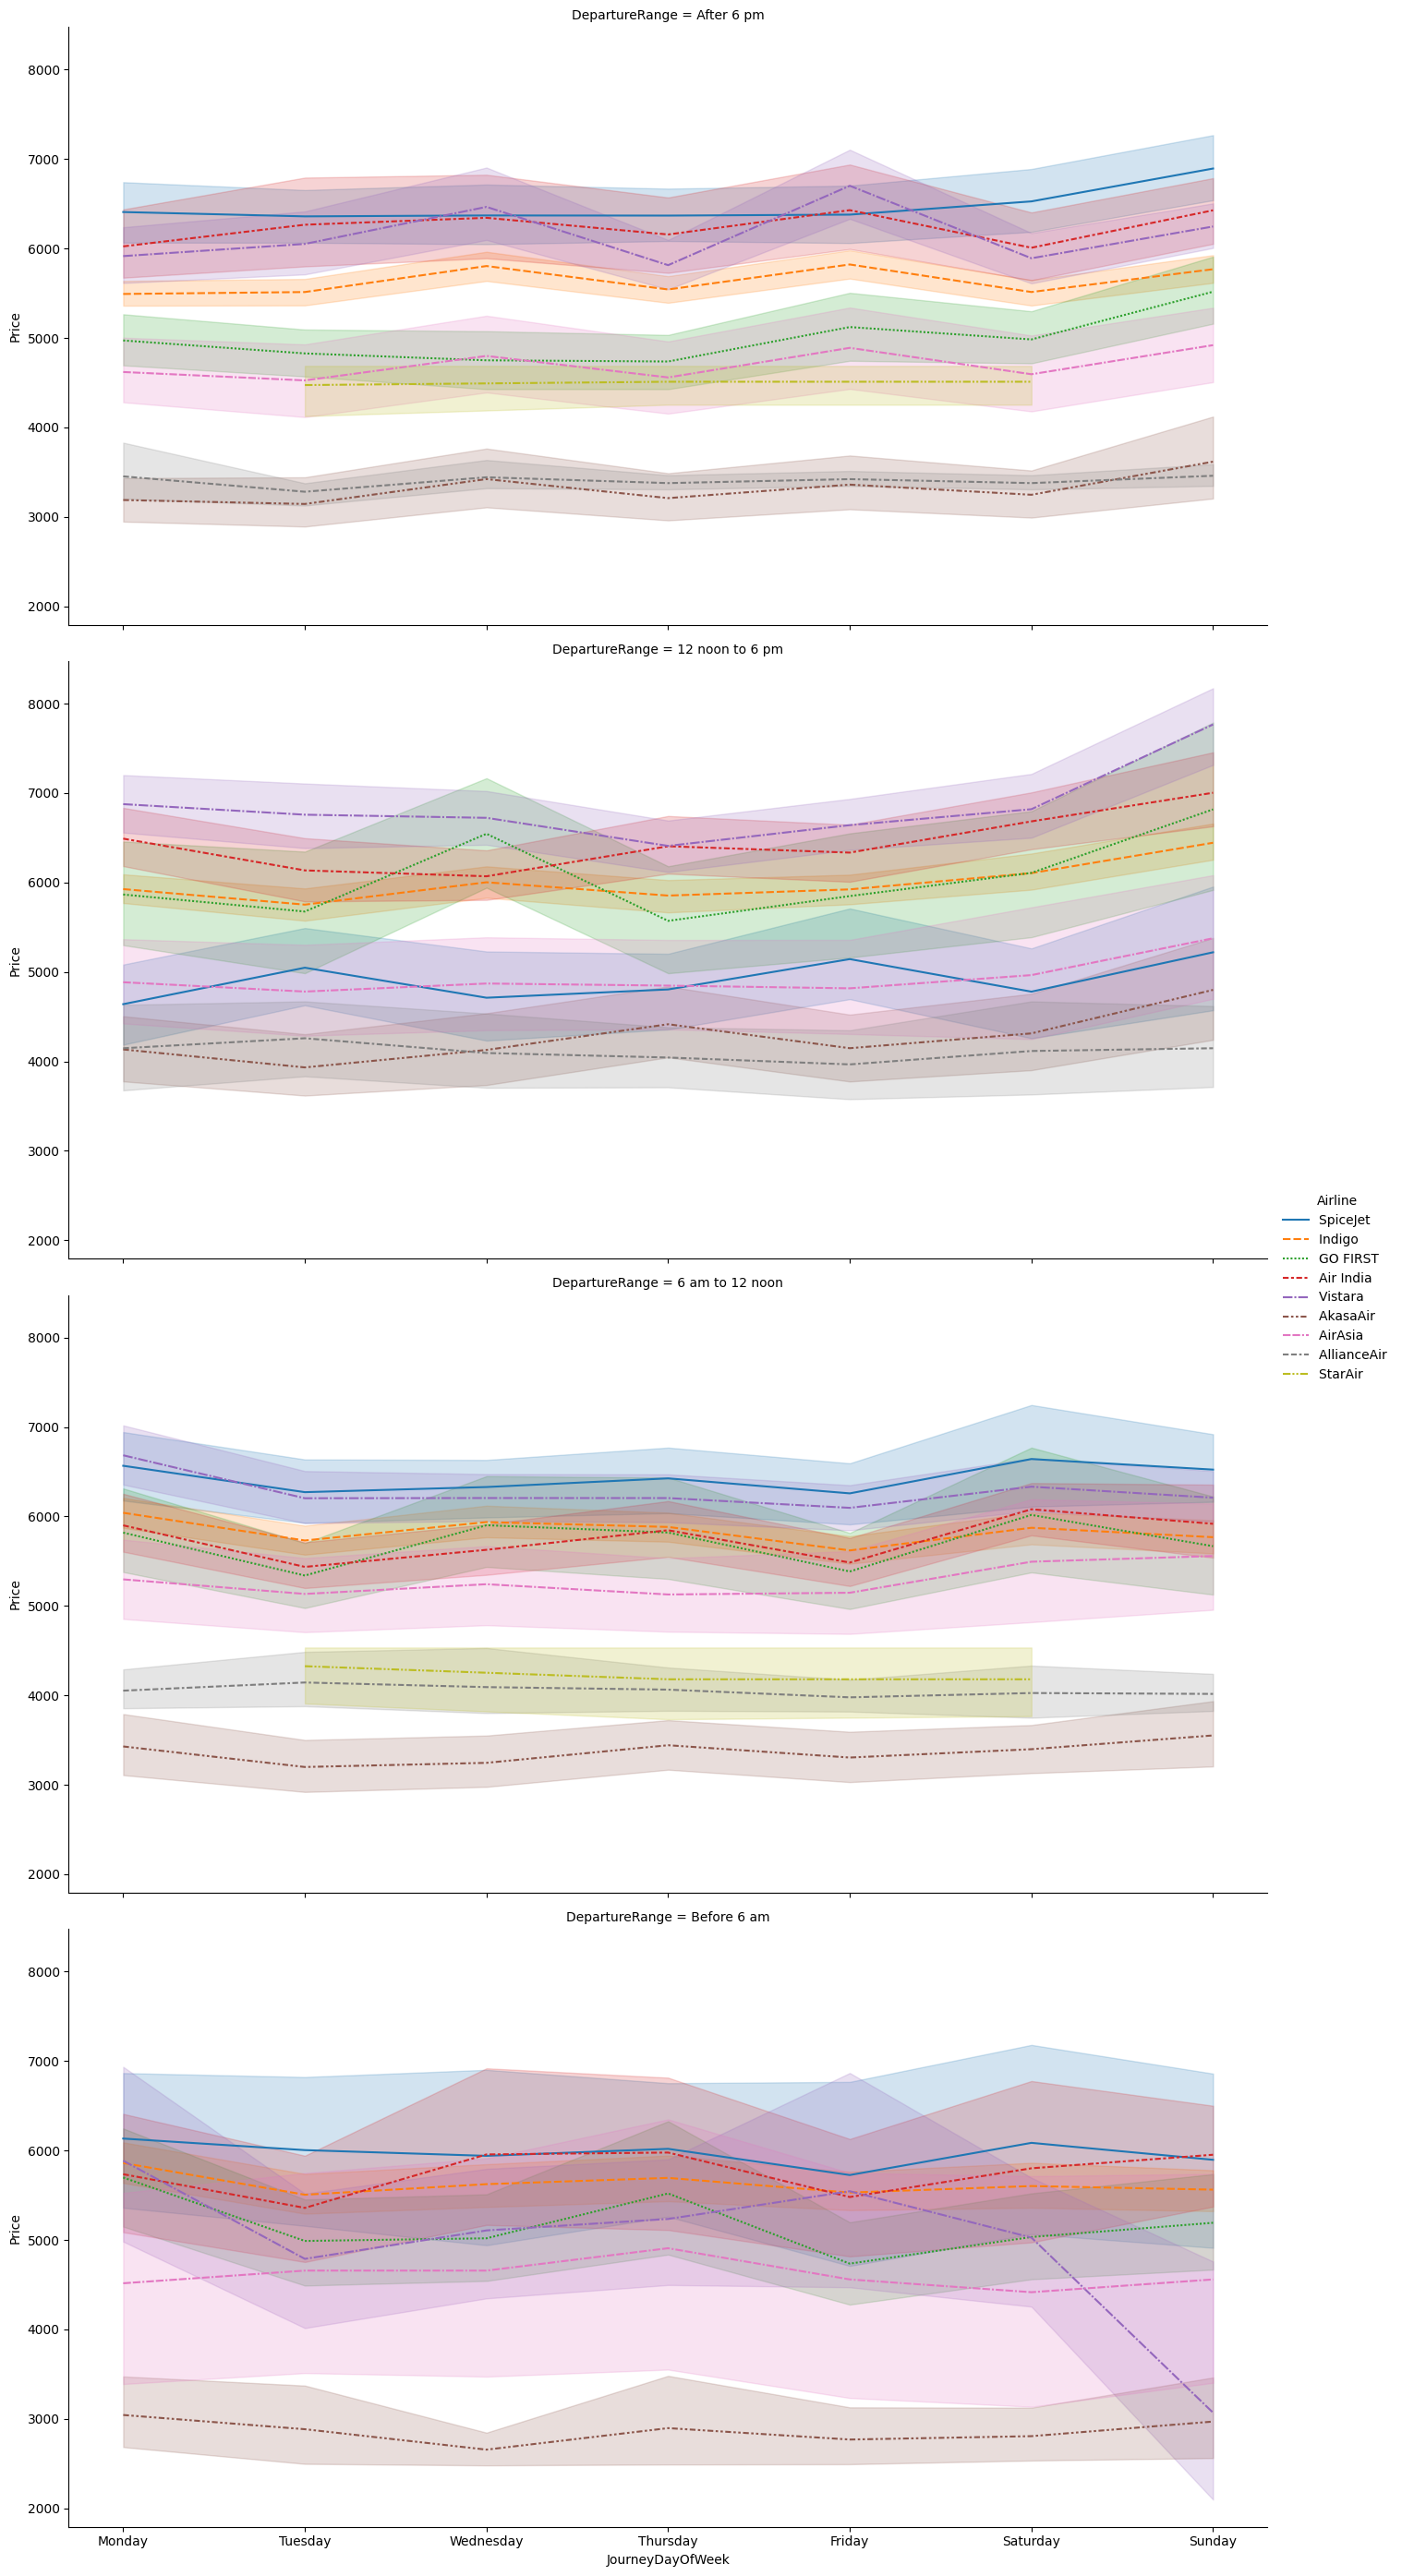

In [29]:
sns.relplot(
    data=afDataset.loc[(afDataset["Class"] == "ECONOMY") & (afDataset["Total Stops"] == 0)], x="JourneyDayOfWeek", y="Price", row="DepartureRange",
    hue="Airline", style="Airline", kind="line",height=7, aspect=2
)

In [31]:
afDataset.head()

,Date of Booking,Date of Journey,Duration,Total Stops,Price,Airline,FlightNo,Class,DepartureTime,DepartureLocation,ArrivalTime,ArrivalLocation,BookingJourneyDifference,JourneyDayOfWeek,DepartureRange,ArrivalRange
0,2023-01-15,2023-01-16,2.05,0,5335,SpiceJet,SG-8169,ECONOMY,20:00,Delhi,22:05,Mumbai,1.0,Monday,After 6 pm,After 6 pm
1,2023-01-15,2023-01-16,2.20,0,5899,Indigo,6E-2519,ECONOMY,23:00,Delhi,01:20,Mumbai,1.0,Monday,After 6 pm,Before 6 am
2,2023-01-15,2023-01-16,2.10,0,5801,GO FIRST,G8- 354,ECONOMY,22:30,Delhi,00:40,Mumbai,1.0,Monday,After 6 pm,Before 6 am
3,2023-01-15,2023-01-16,2.05,0,5794,SpiceJet,SG-8709,ECONOMY,18:50,Delhi,20:55,Mumbai,1.0,Monday,After 6 pm,After 6 pm
4,2023-01-15,2023-01-16,2.10,0,5955,Air India,AI-805,ECONOMY,20:00,Delhi,22:10,Mumbai,1.0,Monday,After 6 pm,After 6 pm


In [37]:
afDatasetProcessed = afDataset.drop(["Date of Booking","Date of Journey","FlightNo","DepartureTime","ArrivalTime"],axis=1)
afDatasetProcessed.head()

,Duration,Total Stops,Price,Airline,Class,DepartureLocation,ArrivalLocation,BookingJourneyDifference,JourneyDayOfWeek,DepartureRange,ArrivalRange
0,2.05,0,5335,SpiceJet,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,After 6 pm
1,2.20,0,5899,Indigo,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,Before 6 am
2,2.10,0,5801,GO FIRST,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,Before 6 am
3,2.05,0,5794,SpiceJet,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,After 6 pm
4,2.10,0,5955,Air India,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,After 6 pm


In [39]:
afDatasetProcessed.to_csv("processedAFDataset.csv", index=False)
